<a href="https://colab.research.google.com/github/gabriquaranta/drones-stuff/blob/main/yolo11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.6/911.6 kB 52.4 MB/s eta 0:00:00


In [2]:
!kaggle datasets download dasmehdixtr/drone-dataset-uav

Dataset URL: https://www.kaggle.com/datasets/dasmehdixtr/drone-dataset-uav
License(s): copyright-authors
100% 714M/716M [00:35<00:00, 22.2MB/s]
100% 716M/716M [00:35<00:00, 21.3MB/s]


## DATASET DOWNLOAD AND PREP

In [3]:
%%capture
!unzip drone-dataset-uav.zip
!rm -rf ./dataset_xml_format/

In [4]:
import os
import random

dirname='./drone_dataset_yolo/dataset_txt'

#count txt files in drone_dataset_yoy/dataset_txt
filenames = [f[:-4] for f in os.listdir(dirname) if f.endswith('.txt')]
n_pics=len(filenames)
print(n_pics)

ids=[i for i in range(n_pics)]
random.shuffle(ids)
#print(ids)

trainratio=0.8
valratio=0.1
testratio=0.1

train_ids=ids[:int(n_pics*trainratio)]
val_ids=ids[int(n_pics*trainratio):int(n_pics*(trainratio+valratio))]
test_ids=ids[int(n_pics*(trainratio+valratio)):]

print(len(train_ids), len(val_ids), len(test_ids))

1360
1088 136 136


In [5]:
!mkdir ./datasets
!mkdir ./datasets/train
!mkdir ./datasets/val
!mkdir ./datasets/test

# cp images and txt from drone_dataset_yolo to corresponding train or test folders
for i in train_ids:
  try:
    !cp ./drone_dataset_yolo/dataset_txt/{filenames[i]}.txt ./datasets/train/{filenames[i]}.txt
    !cp ./drone_dataset_yolo/dataset_txt/{filenames[i]}.jpg ./datasets/train/{filenames[i]}.jpg
  except:
    print(filenames[i])
    continue

for i in val_ids:
  try:
    !cp ./drone_dataset_yolo/dataset_txt/{filenames[i]}.txt ./datasets/val/{filenames[i]}.txt
    !cp ./drone_dataset_yolo/dataset_txt/{filenames[i]}.jpg ./datasets/val/{filenames[i]}.jpg
  except:
    print(filenames[i])
    continue

for i in test_ids:
  try:
    !cp ./drone_dataset_yolo/dataset_txt/{filenames[i]}.txt ./datasets/test/{filenames[i]}.txt
    !cp ./drone_dataset_yolo/dataset_txt/{filenames[i]}.jpg ./datasets/test/{filenames[i]}.jpg
  except:
    print(filenames[i])
    continue


cp: cannot stat './drone_dataset_yolo/dataset_txt/classes.jpg': No such file or directory


In [6]:
import yaml

data_yaml = dict(
    train ='train',
    val = 'val',
    test='test',
    nc =1,
    names =['drone']
)

with open('data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

%cat data.yaml

{names: [drone], nc: 1, test: test, train: train, val: val}


## SET UP MODEL

In [7]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 294MB/s]


In [8]:
results = model.train(data="data.yaml", epochs=24, imgsz=480)

Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=data.yaml, epochs=24, time=None, patience=100, batch=16, imgsz=480, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width

100%|██████████| 755k/755k [00:00<00:00, 97.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/datasets/train... 1087 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1087/1087 [00:00<00:00, 1237.33it/s]

train: WARNING ⚠️ /content/datasets/train/pic_722.jpg: corrupt JPEG restored and saved
train: New cache created: /content/datasets/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/val... 136 images, 0 backgrounds, 0 corrupt: 100%|██████████| 136/136 [00:00<00:00, 917.01it/s] 

val: New cache created: /content/datasets/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 480 train, 480 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 24 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/24      1.44G      1.452      2.079      1.496         39        480: 100%|██████████| 68/68 [00:31<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        136        140      0.694      0.536      0.654      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/24      1.36G      1.507      1.607        1.5         37        480: 100%|██████████| 68/68 [00:28<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.80it/s]

                   all        136        140      0.384        0.5      0.421      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/24      1.38G      1.547      1.551      1.547         43        480: 100%|██████████| 68/68 [00:26<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.02it/s]

                   all        136        140      0.362       0.51      0.338      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/24      1.37G      1.552      1.467      1.539         38        480: 100%|██████████| 68/68 [00:25<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.55it/s]


                   all        136        140      0.265      0.193       0.15     0.0441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/24      1.36G      1.522      1.384      1.505         49        480: 100%|██████████| 68/68 [00:27<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.83it/s]

                   all        136        140      0.789      0.686      0.774      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/24      1.37G      1.456       1.27       1.46         37        480: 100%|██████████| 68/68 [00:28<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.17it/s]

                   all        136        140      0.845      0.855      0.906      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/24      1.36G      1.442      1.206       1.44         36        480: 100%|██████████| 68/68 [00:24<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        136        140      0.723      0.726      0.797      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/24      1.38G      1.429       1.17      1.417         32        480: 100%|██████████| 68/68 [00:25<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]

                   all        136        140      0.885      0.857      0.897      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/24      1.36G       1.41      1.118      1.414         41        480: 100%|██████████| 68/68 [00:28<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.19it/s]

                   all        136        140      0.874      0.836      0.904      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/24      1.37G      1.409      1.119      1.411         56        480: 100%|██████████| 68/68 [00:26<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.10it/s]

                   all        136        140      0.892      0.814       0.93      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/24      1.36G      1.335      1.056      1.366         47        480: 100%|██████████| 68/68 [00:24<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.20it/s]

                   all        136        140       0.89      0.907      0.928      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/24      1.37G      1.318     0.9891      1.349         32        480: 100%|██████████| 68/68 [00:27<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.79it/s]

                   all        136        140      0.926      0.896      0.968      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/24      1.36G      1.288      0.968      1.339         37        480: 100%|██████████| 68/68 [00:27<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.65it/s]

                   all        136        140      0.933        0.9      0.967      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/24      1.37G      1.241     0.9225      1.312         56        480: 100%|██████████| 68/68 [00:25<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]

                   all        136        140       0.95      0.946      0.985      0.633


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/24      1.37G      1.142     0.8075      1.285         15        480: 100%|██████████| 68/68 [00:26<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.88it/s]

                   all        136        140      0.897      0.864      0.938      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/24      1.37G       1.13     0.7242      1.282         15        480: 100%|██████████| 68/68 [00:27<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.94it/s]

                   all        136        140      0.938      0.929      0.975      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/24      1.37G      1.106      0.718      1.268         15        480: 100%|██████████| 68/68 [00:27<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]

                   all        136        140      0.924      0.936      0.956       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/24      1.37G      1.082     0.6616      1.239         16        480: 100%|██████████| 68/68 [00:24<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]

                   all        136        140      0.918      0.957      0.986      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/24      1.37G      1.078     0.6693      1.242         16        480: 100%|██████████| 68/68 [00:25<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.59it/s]

                   all        136        140      0.975      0.971      0.992      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/24      1.37G      1.046     0.6267      1.239         16        480: 100%|██████████| 68/68 [00:27<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.74it/s]

                   all        136        140       0.95      0.944      0.987      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/24      1.37G      1.026      0.602      1.203         16        480: 100%|██████████| 68/68 [00:24<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.25it/s]

                   all        136        140       0.95      0.993      0.992      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/24      1.37G     0.9915     0.5614      1.185         20        480: 100%|██████████| 68/68 [00:24<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.77it/s]

                   all        136        140      0.963      0.979      0.992      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/24      1.37G     0.9623     0.5559      1.175         19        480: 100%|██████████| 68/68 [00:27<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.02it/s]

                   all        136        140       0.99      0.971      0.994      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/24      1.37G     0.9433     0.5361      1.155         15        480: 100%|██████████| 68/68 [00:25<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]

                   all        136        140      0.981      0.971      0.993      0.703



24 epochs completed in 0.201 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]


                   all        136        140      0.981      0.971      0.993      0.702
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train


#### PLOT SOME VAL IMAGES

./runs/detect/train


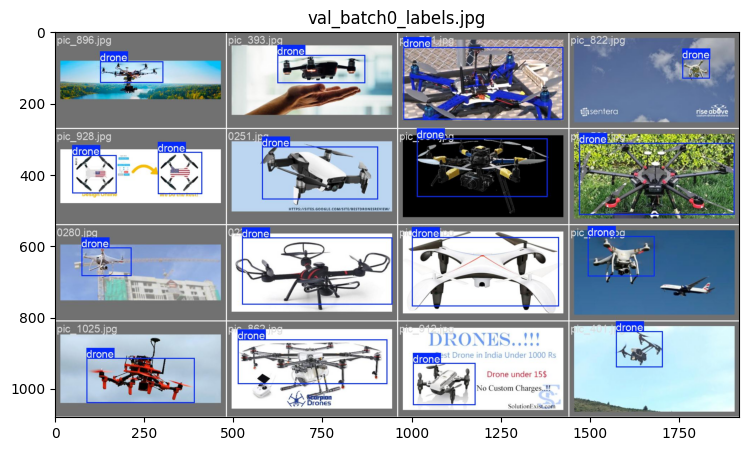

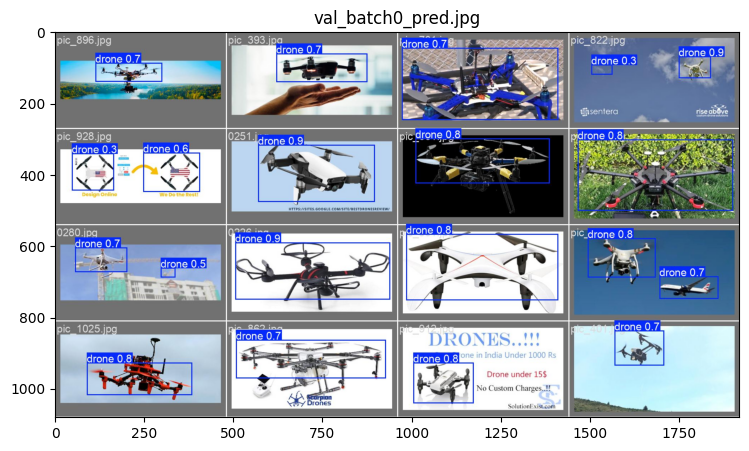

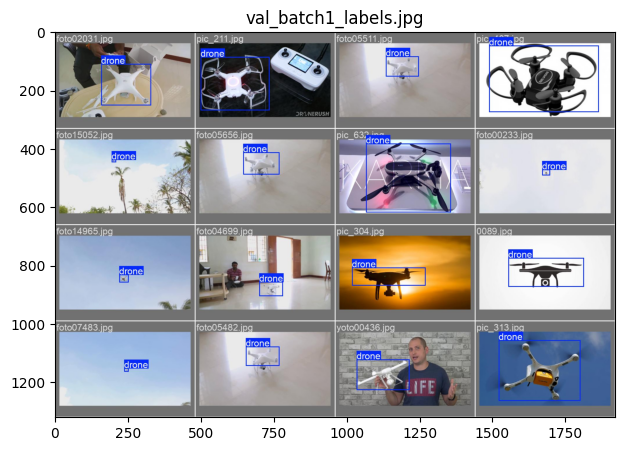

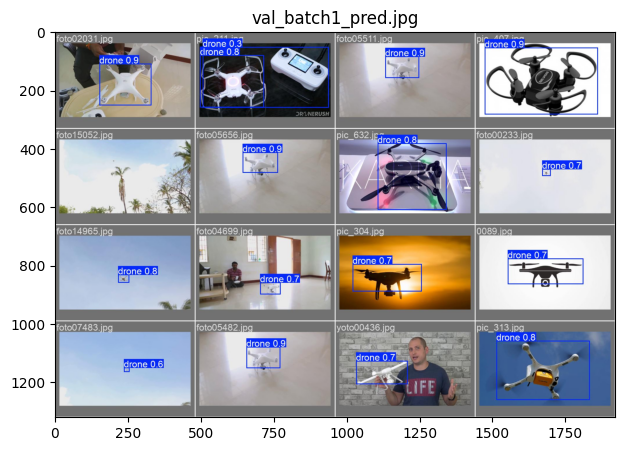

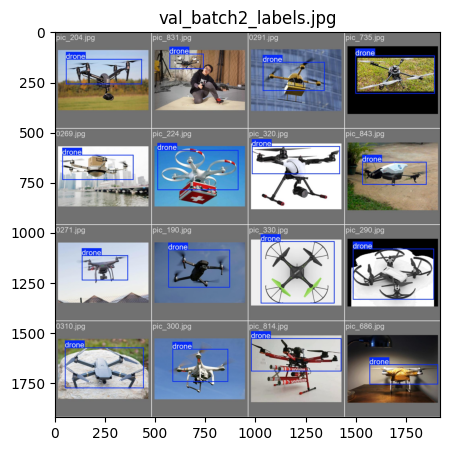

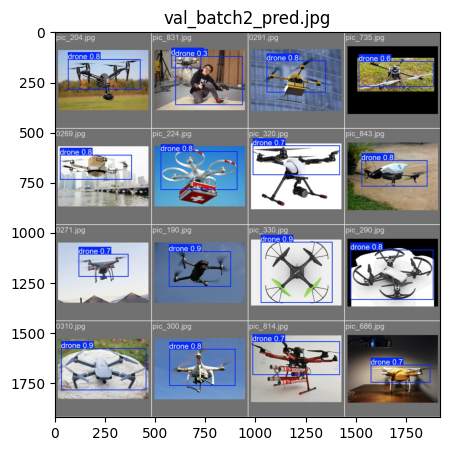

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

rus_outputs='./runs/detect/'
out_dir=os.path.join(rus_outputs,os.listdir(rus_outputs)[0])
print(out_dir)

imgs=[]

for val_res in os.listdir(out_dir):
  if 'val_batch' in val_res:
    imgs.append(val_res)

imgs.sort()
for val_res in imgs:
    image = Image.open(os.path.join(out_dir,val_res))
    image=np.array(image)
    plt.figure(figsize=(10,5))
    plt.title(val_res)
    plt.imshow(image)
    plt.show()




## PREDICT

In [10]:
best_pt=os.path.join(rus_outputs,os.listdir(rus_outputs)[0],'weights/best.pt')
print(best_pt)

best_model=YOLO(best_pt)

predictions=best_model.predict(source='datasets/test', save=True,save_txt=True)

pred_dir=os.path.join(rus_outputs,os.listdir(rus_outputs)[0],'labels')
print(pred_dir)

./runs/detect/train/weights/best.pt

image 1/136 /content/datasets/test/0007.jpg: 288x480 1 drone, 46.3ms
image 2/136 /content/datasets/test/0013.jpg: 320x480 1 drone, 45.0ms
image 3/136 /content/datasets/test/0016.jpg: 384x480 1 drone, 44.1ms
image 4/136 /content/datasets/test/0037.jpg: 384x480 1 drone, 8.8ms
image 5/136 /content/datasets/test/0039.jpg: 320x480 2 drones, 8.9ms
image 6/136 /content/datasets/test/0040.jpg: 256x480 1 drone, 45.0ms
image 7/136 /content/datasets/test/0069.jpg: 320x480 1 drone, 9.1ms
image 8/136 /content/datasets/test/0070.jpg: 320x480 1 drone, 10.2ms
image 9/136 /content/datasets/test/0084.jpg: 480x480 1 drone, 12.0ms
image 10/136 /content/datasets/test/0092.jpg: 480x480 2 drones, 16.6ms
image 11/136 /content/datasets/test/0216.jpg: 288x480 1 drone, 10.8ms
image 12/136 /content/datasets/test/0219.jpg: 320x480 1 drone, 15.7ms
image 13/136 /content/datasets/test/0225.jpg: 224x480 1 drone, 68.2ms
image 14/136 /content/datasets/test/0237.jpg: 320x480 1 drone, 

In [11]:
labels_dir='./drone_dataset_yolo/dataset_txt'

# intersection over inion
ious=[]

for res in os.listdir(pred_dir):
  if res in os.listdir(labels_dir):
    pred_file=os.path.join(pred_dir,res)
    labels_file=os.path.join(labels_dir,res)

    pred_lines=open(pred_file,'r').readlines()
    labels_lines=open(labels_file,'r').readlines()

    for pred_line in pred_lines:
      pred_line_split=pred_line.split(' ')

      pred_x1=float(pred_line_split[1])
      pred_y1=float(pred_line_split[2])
      pred_x2=float(pred_line_split[3])
      pred_y2=float(pred_line_split[4])

      iou=0.0
      for labels_line in labels_lines:
        labels_line_split=labels_line.split(' ')
        labels_x1=float(labels_line_split[1])
        labels_y1=float(labels_line_split[2])
        labels_x2=float(labels_line_split[3])
        labels_y2=float(labels_line_split[4])

      intersection=max(0,min(pred_x2,labels_x2)-max(pred_x1,labels_x1))*max(0,min(pred_y2,labels_y2)-max(pred_y1,labels_y1))
      union=(pred_x2-pred_x1)*(pred_y2-pred_y1)+(labels_x2-labels_x1)*(labels_y2-labels_y1)-intersection
      iou=intersection/union
      ious.append(iou)

print(len(ious))
print(ious)
print(sum(ious)/len(ious))
print(len([i for i in ious if i>0.5]))
print(len([i for i in ious if i>0.75]))


159
[0.5074383631628449, 0.0, 0.0, 0.007288899685875641, 0.1373326768503505, 0.7900976849915085, 0.5112349881096317, 0.5230071245311986, 0.7347249979676834, 0.5217903618045979, -0.0, 0.7764298680738196, -0.0, -0.0, 0.4311744612021065, 0.0, 0.42312392689063755, -0.0, 0.8654448886170981, 0.4722851705010619, 0.0, 0.0, 0.0, 0.0, -0.0, 0.8180799498822486, 0.45561877623367997, 0.9437498688182308, -0.0, 0.0, 0.0, -0.0, 0.699557254305016, 0.5501978427059674, 0.11806372072066379, 0.9024431114622895, -0.0, 0.7223079448770162, 0.0, -0.0, 0.5329114590577797, 0.5452841507733682, -0.0, 0.8197030052711124, 0.24432533763850903, -0.0, -0.0, 0.5269122231563586, 0.7489151996601621, 0.0, 0.0, 0.0, -0.0, 0.764714353804397, 0.6824170059374064, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.7706256680285861, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.455674105423613, 0.6157569681523996, 0.9320667452854363, 0.6567138950237039, 0.0, -0.0, 0.8932183603852214, -0.0,